### 💾💻📊 Data Science - MMI Portfolio No. 2
# 💥 & Dimensionality Reduction for Visualization and Machine Learning 💥

An extremely common dataset for benchmarking, method development, and tutorials is **MNIST** consisting of handwritten digits. In reference to this dataset several variants appeared such as sign-MNIST (photos of hand gestures for sign language), audioMNIST (audiofiles of spoken digits) and **fashionMNIST** made of low resolution photos of 10 types of clothes. We will here use this tp explore different possibilities for using dimensionality reduction techniques.

Please complete the following exercises:
## 1. Data Visualization
- Use PCA to create a scatter plot of all 60,000 fashionMNIST images (in the training set)
- Use t-SNE and UMAP for the same purpose. Vary the respective key parameters (perplexity for t-SNE, n_neighbors, and -if you want- min_dist for UMAP).
- Give a short (say 1-2 paragraph) summary where you compare all three and explain which variant you prefer and why.
- Pick one variant and reduce to 3 (instead of 2) dimensions and plot the data again. You may also reduce the number of points if performance becomes an issue and you may use any visualization tool you like for this task. One possible option is `pyplot` (https://plotly.com/python/3d-scatter-plots/).


Hint: if t-SNE and/or UMAP are too slow, feel free to use PCA for an initial reduction of dimensions.


## 2. Machine Learning on top of PCA
In most cases, image classification is best done using deep learning techniques (such as CNNs).
However, for such simple images simpler techniques could work as well.
And, it is a good chance to learn how PCA can be used as a first step to reduce the complexity of a problem ;)

- Use PCA to reduce the number of dimensions until the PCA components cover 85 -90% of the variance (this can be done by setting `n_components` to a float value such as 0.85 or 0.9). 
- Check how much of the image information is preserved by doing an inverse transformation from PCa components back to an image using `.inverse_transform()`. It is sufficient to do this for a few example images.
- Use the reduced PCA vectors of all images ("pca_embeddings") to train two types of classification models: k-NN and RandomForest.
- Evaluate how good those models perform on the task of predicting the type of clothes.


## Libraries to use:
- PCA and t-SNE as well as the named machine learning models can all be found in `Scikit-Learn`.
- UMAP comes as another Python library (umap-learn), see also: https://umap-learn.readthedocs.io/en/latest/basic_usage.html
- Optional: Feel free to make use of the Scikit-Learn `Pipeline`.


## General instructions
- The final notebook should be executable in the correct order (this means it should work if you do `Kernel` --> `Restart kernel and run all cells...`)
- Just providing code and plots is not enough, you should document and comment where necessary. Not so much on small code-related things (you may still do this if you want though, but this is not required), but mostly to explain what you do, why you do it, what you observe.

More specifically:
- Please briefly comment on the changes you make to the data, in particular if you apply complex operations or if your changes depend on a certain choice you have to make.
- Please add descriptions and/or interpretations to the results you generate (for instance tables, plots). This doesn't have to be a lot of text. For simple, easy-to-understand results, a brief sentence can be enough. For more complex results, you might want to add a bit more explanation.

---
Please add your Name here
## Name: Kevin Zielke

---

## Imports and helper function
Use this part to import the main libraries used in this notebook.  
Also add more complex helper functions to this part (if you use any).

In [7]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# add imports if anything is missing
# for instance. feel free to use other plotting libraries (e.g. seaborn, plotly...)

## Data download and import
As mentioned above we here work with the **fashionMNIST** dataset. You can find download links to the data as well as additional information on the [fashion MNIST GitHub page](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file).


In [8]:
#!pip install idx2numpy

In [9]:
import idx2numpy

path_data = "..\\..\\datasets\\fashionMNIST"

file_train = os.path.join(path_data, "train-images-idx3-ubyte")
images_train = idx2numpy.convert_from_file(file_train)

file_test = os.path.join(path_data, "t10k-images-idx3-ubyte")
images_test = idx2numpy.convert_from_file(file_test)

In [10]:
# those tests should pass if you have the correct data
assert images_train.shape == (60000, 28, 28)
assert images_test.shape == (10000, 28, 28)

assert images_train[0].max() == 255
assert images_train[0].min() == 0

In [11]:
label_tags = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

# Read from ubyte and convert to numpy array
file_train = os.path.join(path_data, "train-labels-idx1-ubyte")
labels_train = idx2numpy.convert_from_file(file_train)

file_test = os.path.join(path_data, "t10k-labels-idx1-ubyte")
labels_test = idx2numpy.convert_from_file(file_test)

# Convert to DataFrame
labels_train = pd.DataFrame([label_tags[x] for x in labels_train],
                            columns=["label"]
                           )
labels_test = pd.DataFrame([label_tags[x] for x in labels_test],
                            columns=["label"]
                           )

In [12]:
# those tests should pass if you have the correct data
assert labels_train.shape == (60000, 1)
assert labels_test.shape == (10000, 1)
assert np.all(labels_train.label.values[:5] == ['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top'])

## First Exploration 
Here some code to get a first impression of the data.

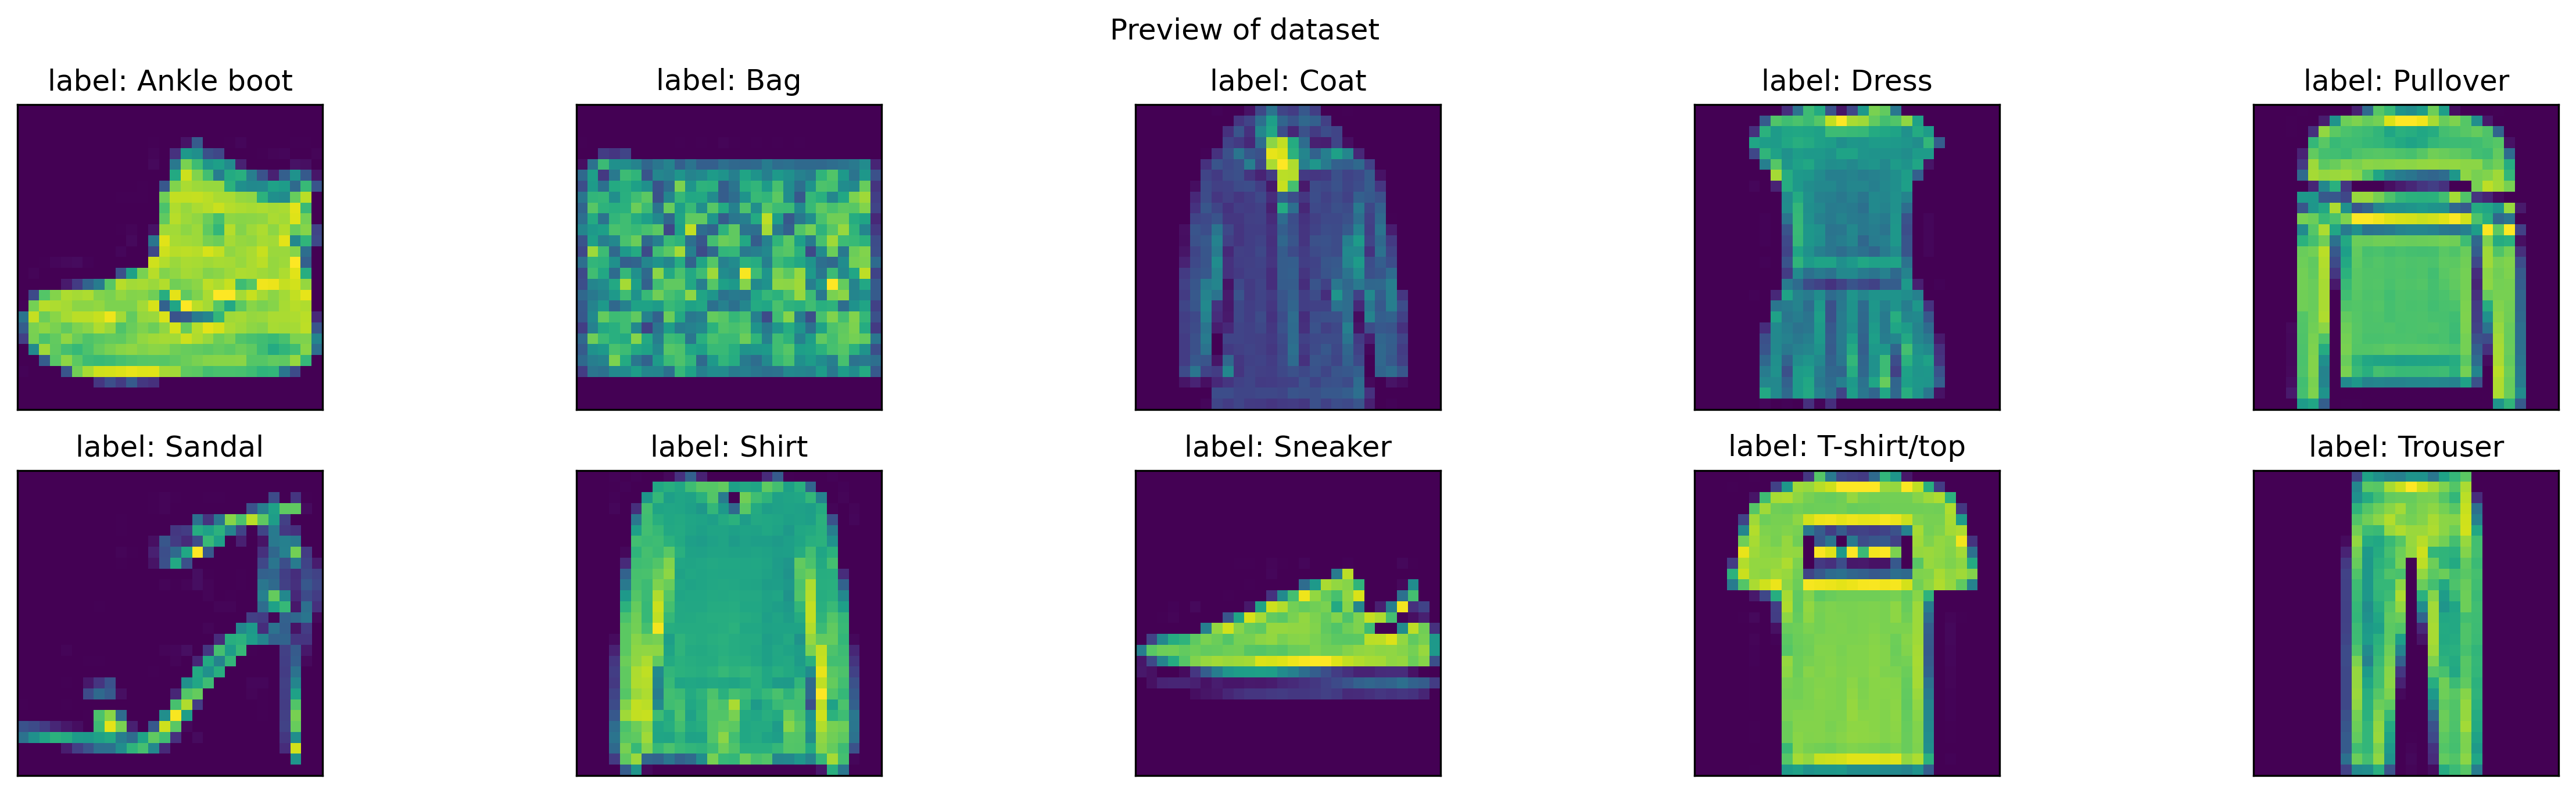

In [13]:
labels = np.unique(labels_train)

example_indices = []
example_labels = []

for label in labels:
    example_labels.append(label)
    example_indices.append(np.where(labels_train.label == label)[0][0])


# Plot example images
fig, axes = plt.subplots(2, 5, figsize=(20, 5), dpi=300)
fig.suptitle('Preview of dataset')

for i, ax in enumerate(axes.flat):
    index = example_indices[i]
    ax.imshow(images_train[index, :, :])#, cmap='gray')
    ax.set_title(f'label: {example_labels[i]}')
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.grid(False)  # Remove grid

plt.show()

## 1. Data Visualization
- Use PCA to create a scatter plot of all 60,000 fashionMNIST images (in the training set)
- Use t-SNE and UMAP for the same purpose. Vary the respective key parameters (perplexity for t-SNE, n_neighbors, and -if you want- min_dist for UMAP).
- Give a short (say 1-2 paragraph) summary where you compare all three and explain which variant you prefer and why.
- Pick one variant and reduce to 3 (instead of 2) dimensions and plot the data again. You may also reduce the number of points if performance becomes an issue and you may use any visualization tool you like for this task. One possible option is `pyplot` (https://plotly.com/python/3d-scatter-plots/).

### PCA
Use PCA to create a scatter plot of all 60,000 fashionMNIST images (in the training set)

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

We have 60.000 monochromatic images in the training set. Each image is represented by an array of 28x28 float values between 0 and 255. These values represent the brightness of one pixel. Since these values are all the data, we dont need to standardize it.
We need to flatten the images to a one-dimensional array with 784 pixels for the PCA-method to work. This reduces the dimensions of the array, but the amount of data still stays the same. Finally PCA is applied to reduce the dimensionality to only 2 dimensions:

In [16]:
print(images_train.shape)

X_flat = images_train.reshape(images_train.shape[0], -1)
print(X_flat.shape)

# # Standardize the features
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X_flat)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)
X_pca.shape

(60000, 28, 28)
(60000, 784)


(60000, 2)

Now every image has an PCA-embedding of 2 dimensions. We can plot these embeddings in a scatter plot. To verify if this method was of any use, we will color the points by their class and see if the classes are somewhat separated. We use seaborns default color palette for this, because it is designed to be easily readable for catecorical data.

In [17]:
import seaborn as sb

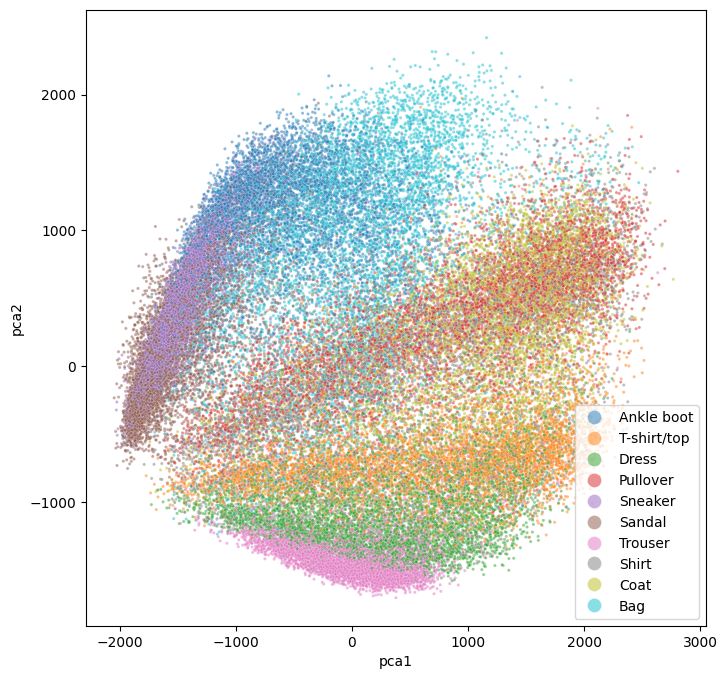

In [42]:
# Create a DataFrame with the two components
pca_plot_data = pd.DataFrame(data = X_pca, columns = ['pca1', 'pca2'])
pca_plot_data[["labels"]] = labels_train

fig, ax = plt.subplots(figsize=(8, 8))
sb.scatterplot(data=pca_plot_data,
                x="pca1",
                y="pca2",
                hue="labels",
                s = 5,
                alpha=0.5)

handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(10)
ax.legend(handles, labels)

plt.show()

We can see that the classes have some separation using PCA, but there is still a lot of overlap. This is because PCA is a linear method and the classes are not linearly separable. 

### t-SNE

Use t-SNE and UMAP for the same purpose. Vary the respective key parameters (perplexity for t-SNE, n_neighbors, and -if you want- min_dist for UMAP).

In [31]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
labelencoder = LabelEncoder()

In [20]:
subset = 100

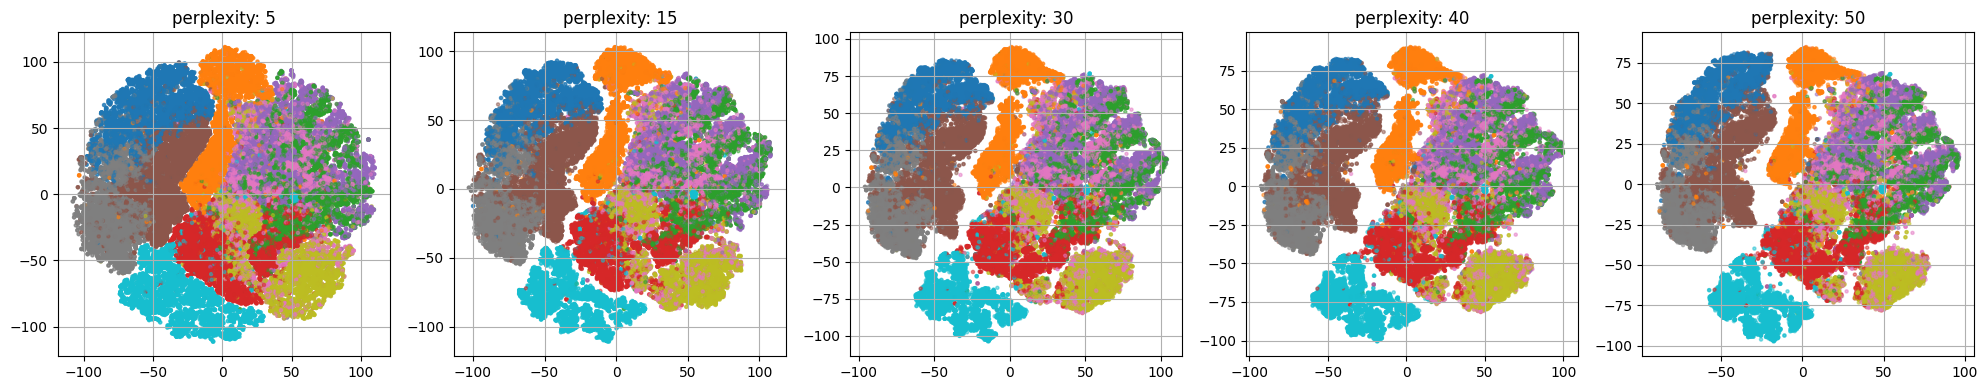

In [59]:
perplexities = [5, 15, 30, 40, 50]
fig, axs = plt.subplots(1, len(perplexities), figsize=(4*len(perplexities) ,4))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_flat)#[:subset])
    
    filename = "t-SNE - perplexity=" + str(perplexity) + ".csv"
    pd.DataFrame(X_tsne).to_csv(os.path.join(path_data, filename), index=False)

    axs[i].scatter(X_tsne[:, 0], X_tsne[:, 1],
                   alpha=0.5,
                   s=5,
                   c=labelencoder.fit_transform(labels_train['label']),#[:subset],
                   cmap='tab10')
    axs[i].set_title(f"perplexity: {perplexity}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

### UMAP

Use t-SNE and UMAP for the same purpose. Vary the respective key parameters (perplexity for t-SNE, n_neighbors, and -if you want- min_dist for UMAP).

In [ ]:
# why has this package such cryptic importing and installation?
#conda install -c conda-forge umap-learn
import umap.umap_ as umap

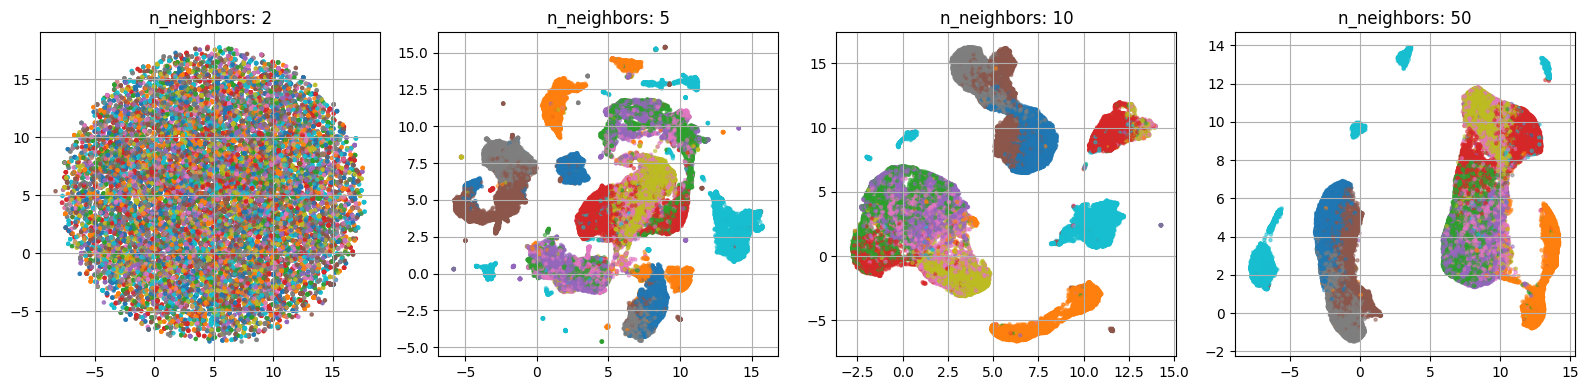

In [58]:

n_neighbors_values = [2, 5, 10, 50]
fig, axs = plt.subplots(1, len(n_neighbors_values), figsize=(4 * len(n_neighbors_values), 4))

for i, n_neighbors in enumerate(n_neighbors_values):
    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, init="random")
    X_umap = reducer.fit_transform(X_flat)#[:subset])

    axs[i].scatter(X_umap[:, 0], X_umap[:, 1],
                   alpha=0.5,
                   s=5,
                   c=labelencoder.fit_transform(labels_train['label']),#[:subset],
                   cmap='tab10')
    axs[i].set_title(f"n_neighbors: {n_neighbors}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()